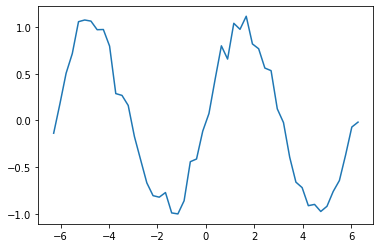

(40, 10, 1)
(40, 1)


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)  # -2π to 2π 
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))  # Add noise to sine function. 

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10  # Num of time series
n_sample = len(x_data)-n_rnn  # Num of samples
x = np.zeros((n_sample, n_rnn))  # input
t = np.zeros((n_sample,))  # label

for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+n_rnn]  # The value right after the time series

x = x.reshape(n_sample, n_rnn, 1)  # （Num of samples、Num of time series、Num of neurons in input layer）
print(x.shape)
t = t.reshape(n_sample, 1)  # （Num of samples、Num of neurons in input layer）
print(t.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

batch_size = 8  # batch size
n_in = 1  # Num of neurons in input layer
n_mid = 20  # Num of neurons in hidden layer 
n_out = 1  # Num of neurons in output layer

# Simple RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=False))  # Use only the last output
model_rnn.add(Dense(n_out, activation="linear"))
model_rnn.compile(loss="mean_squared_error", optimizer="sgd")
print(model_rnn.summary())

# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=False))
model_lstm.add(Dense(n_out, activation="linear"))
model_lstm.compile(loss="mean_squared_error", optimizer="sgd")
print(model_lstm.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
import time

epochs = 200

# RNN
start_time = time.time()
history_rnn = model_rnn.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("time elapsed (RNN):", time.time() - start_time)

# LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("time elapsed (LSTM):", time.time() - start_time)









time elapsed (RNN): 4.192974090576172
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
time elapsed (LSTM): 14.884947061538696


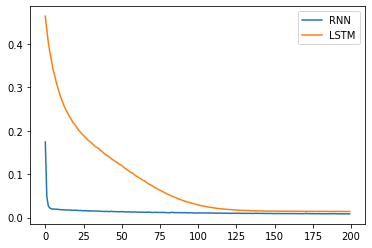

In [6]:
loss_rnn = history_rnn.history['loss']
loss_lstm = history_lstm.history['loss']

plt.plot(np.arange(len(loss_rnn)), loss_rnn, label="RNN")
plt.plot(np.arange(len(loss_lstm)), loss_lstm, label="LSTM")
plt.legend()
plt.show()

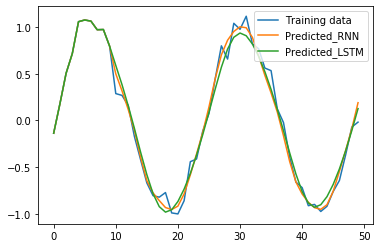

In [7]:
predicted_rnn = x[0].reshape(-1) 
predicted_lstm = x[0].reshape(-1) 

for i in range(0, n_sample):
    y_rnn = model_rnn.predict(predicted_rnn[-n_rnn:].reshape(1, n_rnn, 1))
    predicted_rnn = np.append(predicted_rnn, y_rnn[0][0])
    y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1))
    predicted_lstm = np.append(predicted_lstm, y_lstm[0][0])

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted_rnn)), predicted_rnn, label="Predicted_RNN")
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm, label="Predicted_LSTM")
plt.legend()
plt.show()